### Generar graficas y reportes del total de personas vacunadas

In [1]:
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.pyplot as plt 
import pandas as pd

from datetime import datetime

vacunados=pd.read_csv('vacunas.csv')

In [2]:
fechaInicio=''
dias=0
prediccionDia=''
prediccionDiaFabricantes=''

In [3]:
# Parameters
fechaInicio = "27/01/2021"
dias = 30
prediccionDia = "2021-05-16"
prediccionDiaFabricantes = "16/05/2021"


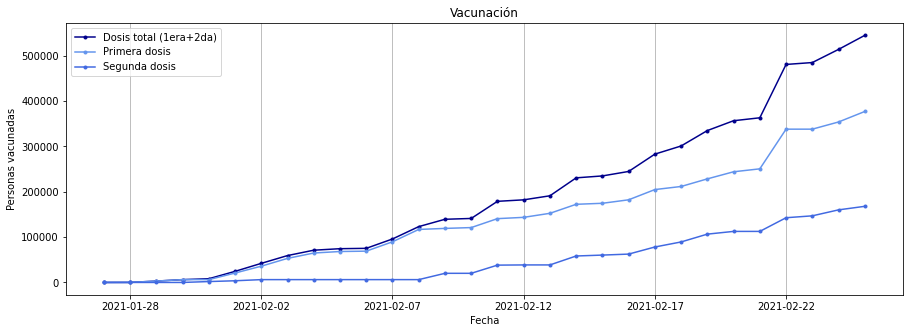

In [4]:
x_fecha=vacunados.fecha=fechaInicio
x_fecha

inicio = datetime.strptime(x_fecha, '%d/%m/%Y')
fin = inicio + dt.timedelta(days=dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))

plt.figure(figsize = (15,5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.title("Vacunación")
plt.xlabel("Fecha")
plt.ylabel("Personas vacunadas")

plt.plot(days, vacunados.dosis_total[:dias], '.-', label='Dosis total (1era+2da)', color='darkblue')
plt.plot(days, vacunados.primera_dosis[:dias], '.-', label='Primera dosis', color='cornflowerblue')
plt.plot(days, vacunados.segunda_dosis[:dias], '.-', label='Segunda dosis', color='royalblue')

plt.legend()
plt.grid(axis = 'x')

plt.show()


La gráfica generada evidencia el número de personas vacunadas con la primera y  la segunda dosis en contraste con el total de vacunados. 

  * La vacunación total empieza a tener una tendencia exponencial evidenciando que dentro de la fase 1 existe una gran aceptación hacia la vacuna.
  
  * La gráfica también evidencia que el número de personas vacunadas con la primera dosis es mucho mayor que las personas vacunadas con la segunda dosis y esto se debe a que los tiempos para la aplicación de la segunda dosis varían desde los 21 días hasta los 80 días según el fabricante.
  
  * El número de personas vacunadas aumentará cuando llegue el plazo de aplicación para la segunda dosis. Si existiesen picos de vacunación con la primera dosis, el mismo pico se evidenciará para la segunda dosis dentro del tiempo de espera para la segunda dosis.

### Generar grafico de pie por fabricante de la vacuna

In [5]:
import pandas as pd
fabricantes=pd.read_csv('fabricantes.csv')

In [6]:
fabricantes=fabricantes.groupby(['vaccine']).sum()
fabricantes

total
vaccine                    
Oxford/AstraZeneca   420000
Pfizer/BioNTech      659880
Sinovac             1020000

In [7]:
plt.figure(figsize=(12,7))
etiquetas = ['Oxford/AstraZeneca','Pfizer/BioNTech','Sinovac']
colors = ['#830050','#007CC2','#D70006']
plt.pie(fabricantes['total'], autopct='%1.1f%%', startangle=0,colors=colors,textprops={'color':"w",'weight':'bold'})
plt.title('Fabricantes de vacunas')
plt.legend(etiquetas, title="Fabricantes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

* La gráfica PIE evidencia claramente que la mayor cantidad de vacunas proviene del fabricante Sinovac.

* Este gráfico retrata la situación actual de los fabricantes de vacunas, donde Pfizer/BioNTech es la vacuna más solicitada a nivel mundial y es la razón por la que se encuentra superada por Sinovac, una vacuna a la cual Ecuador accedió y debido a la demanda que tiene la solicitud fue cumplida rápidamente. 

* Otro caso es el de la vacuna por AstraZeneca la cuál ha demostrado tener efectos adversos los cuales han sido reportados siendo la razón por la que su presencia en el país es menor.

### Generar histogramas de vacunas por mes de llegada y fabricante.

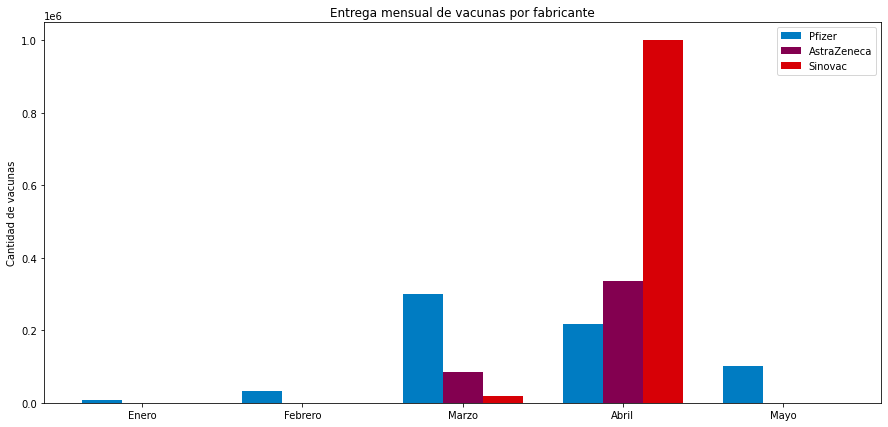

In [8]:
import pandas as pd
fabricantesHist=pd.read_csv('fabricantes.csv')

fabricantesHist['arrived_at'] = pd.to_datetime(fabricantesHist['arrived_at'], format='%d/%m/%Y')

fabricante = ['Oxford/AstraZeneca' , 'Pfizer/BioNTech', 'Sinovac']
valoresPfizer = [0] * 5
valoresAstraZeneca=[0] * 5
valoresSinovac = [0] * 5

for i in range(len(fabricantesHist)):
    if(fabricantesHist.loc[i, "vaccine"] == fabricante[0]):
        valoresAstraZeneca[fabricantesHist.loc[i, "arrived_at"].month-1] += fabricantesHist.loc[i, "total"]
    elif (fabricantesHist.loc[i, "vaccine"] == fabricante[1]):
        valoresPfizer[fabricantesHist.loc[i, "arrived_at"].month-1] += fabricantesHist.loc[i, "total"]
    elif (fabricantesHist.loc[i, "vaccine"] == fabricante[2]):
        valoresSinovac[fabricantesHist.loc[i, "arrived_at"].month-1] += fabricantesHist.loc[i, "total"]
        
import matplotlib.pyplot as plt
import numpy as np

labels = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']

x = np.arange(5)

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x, valoresPfizer, 0.25, label='Pfizer', color="#007CC2")
rects2 = ax.bar(x + 0.25, valoresAstraZeneca, 0.25, label='AstraZeneca', color="#830050")
rects3= ax.bar(x + 0.5, valoresSinovac, 0.25, label='Sinovac', color="#D70006")

ax.set_ylabel('Cantidad de vacunas')
ax.set_title('Entrega mensual de vacunas por fabricante')
ax.set_xticks(x+0.25)
ax.set_xticklabels(labels)
ax.legend()

plt.show()          

* La gráfica demuestra que las primeras vacunas en llegar al país fueron las del fabricante Pfizer/BioNTech. Y no se tiene registro hasta Marzo de la llegada de vacunas de nuevos fabricantes AstraZeneca y Sinovac.

* Abril es el mes en el que se registra la llegada de la mayor cantidad de vacunas.

* En tan solo un mes la vacuna de Sinovac superó en cantidad de dosis a la vacuna de Pfizer.

### Generar un modelo matemático de predicción basado en regresión, del proceso de vacunación en base al número actual de vacunados (1 y 2 dosis) y a la llegada de nuevas vacunas.

In [9]:
import pandas as pd
import datetime as dt
import numpy as np  
import matplotlib.pyplot as plt  

from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


vacunas=pd.read_csv('vacunas.csv')
planVacunarse=pd.read_csv('vacunas_planvacunarse.csv')
fabricantes=pd.read_csv('fabricantes.csv')

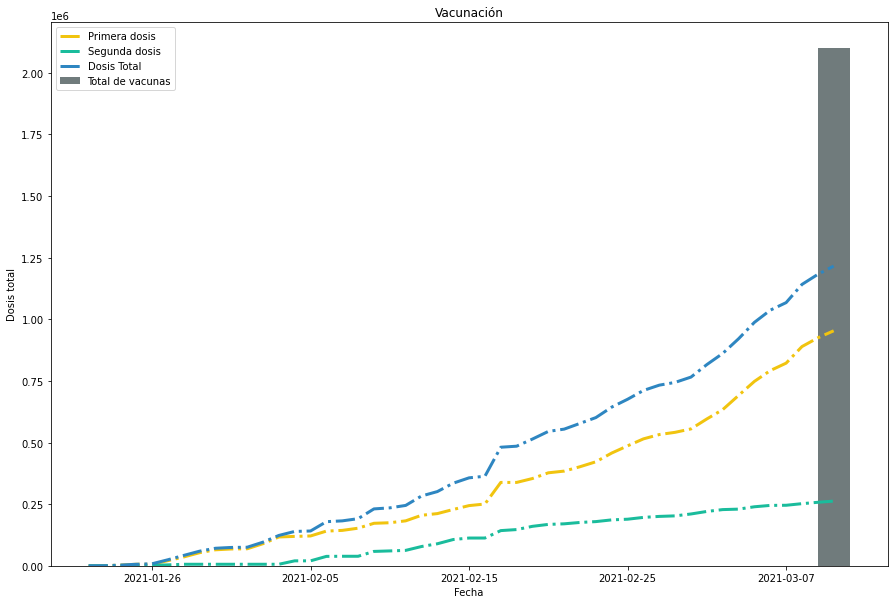

In [10]:
import matplotlib.dates as mdates

x_fecha=vacunas.fecha

inicio = datetime.strptime(x_fecha.iloc[1], '%d/%m/%Y')
fin = inicio + dt.timedelta(days=48)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))

plt.figure(figsize = (15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

x = vacunas['primera_dosis']
y = vacunas['segunda_dosis']
z = vacunas['dosis_total']
plt.plot(days, x,'-.', label ='Primera dosis', color='#F1C40F', linewidth=3.0)
plt.plot(days, y,'-.', label ='Segunda dosis', color='#1ABC9C', linewidth=3.0)
plt.plot(days, z,'-.', label ='Dosis Total', color='#2E86C1', linewidth=3.0)
plt.bar(days[-1], fabricantes['total'].sum(),2, label='Total de vacunas', color='#707B7C')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis total') 
plt.legend()

plt.show()

La cantidad de vacunas aplicadas frente a la cantidad actual de vacunas adquiridas, evidencia que no existe un desabastecimiento de dosis.

In [11]:
FMT = '%Y-%m-%d'
planVacunarse['fecha'] = planVacunarse['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2021-01-01", FMT)).days)
X = planVacunarse['fecha'].values.reshape(-1,1)
y = planVacunarse['primera_dosis'].values.reshape(-1,1)
z = planVacunarse['segunda_dosis'].values.reshape(-1,1)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modeloRF1era = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRF1era.fit(X_train, y_train.ravel())

y_pred1 = modeloRF1era.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()}) 
df1.head()

Actual  Predicted
0       0        0.7
1   12069    10252.5
2      31      511.3
3    5035     7103.4
4   17558    18114.2

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=0)

modeloRF2da = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRF2da.fit(X_train, y_train.ravel())

y_pred2 = modeloRF2da.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()}) 
df1.head()

Actual  Predicted
0       0        0.7
1     313    10252.5
2       0      511.3
3     222     7103.4
4   14873    18114.2

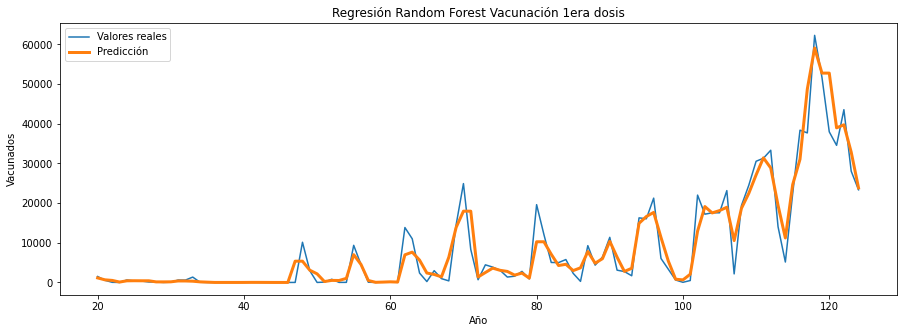

In [14]:
plt.figure(figsize = (15,5))
def rf():
    plt.plot(X, y,'-', label ='Valores reales')
    plt.plot(X, modeloRF1era.predict(X),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Regresión Random Forest Vacunación 1era dosis')
    plt.xlabel('Año')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

rf()

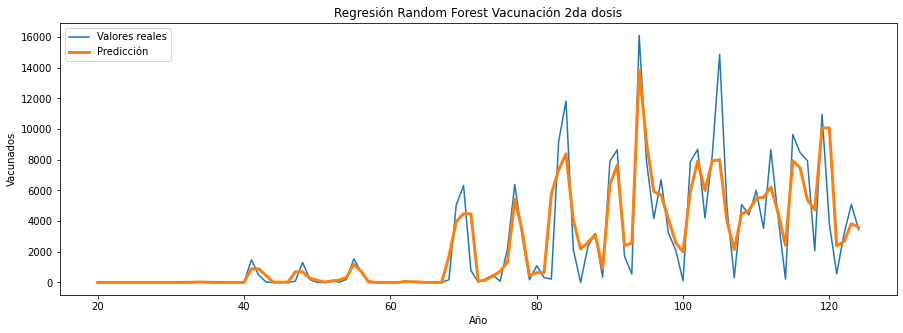

In [15]:
plt.figure(figsize = (15,5))
def rf():
    plt.plot(X, z,'-', label ='Valores reales')
    plt.plot(X, modeloRF2da.predict(X),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Regresión Random Forest Vacunación 2da dosis')
    plt.xlabel('Año')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

rf()

### Fabricantes regresión polinomial

In [16]:
FMT = '%d/%m/%Y'
fabricantes['arrived_at'] = fabricantes['arrived_at'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2021", FMT)).days)

In [17]:
fabricantes=fabricantes[['arrived_at','total']]
fabricantes

X = fabricantes.iloc[:, :-1].values  
y = fabricantes.iloc[:, 1].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [18]:
y_pred2 = pol_reg.predict(poly_reg.fit_transform(X_test)) 
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred2.flatten()}) 
df2

Actual      Predicted
0   16380   20589.266770
1   84000   75209.751910
2   65520  121133.199865
3   53820  203570.045097

In [19]:
from sklearn.metrics import r2_score
preRF=r2_score(y_test,y_pred2)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  -9.477558462818543


In [20]:
plt.figure(figsize = (15,5))
def polymonial():
    plt.plot(X, y,'.', label ='Valores Reales')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Regresión Polinomial')
    plt.xlabel('Fecha')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

polymonial()

### Fabricantes regresión Random Forest

In [21]:
x = fabricantes.iloc[:, :-1].values  
y = fabricantes.iloc[:, 1].values

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

modeloRF1 = RandomForestRegressor(n_estimators=10, random_state=0)
modeloRF1.fit(X_train, y_train.ravel())

y_pred3 = modeloRF1.predict(X_test)
df3 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred3.flatten()}) 
df3

Actual  Predicted
0   16380    24815.0
1   84000    64818.0
2   65520    66222.0
3   53820   244102.0

In [22]:
preRF=r2_score(y_test,y_pred3)
print("Precisión del modelo: ", preRF)

Precisión del modelo:  -13.99125264609288


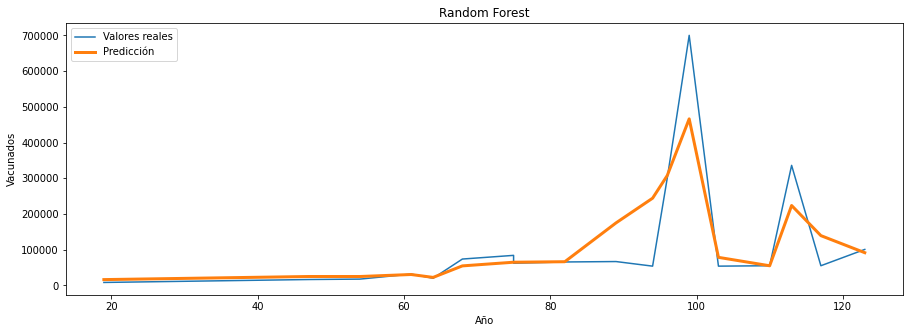

In [23]:
plt.figure(figsize = (15,5))
def polymonial():
    plt.plot(x, y,'-', label ='Valores reales')
    plt.plot(x, modeloRF1.predict(x),  '-', label = 'Predicción', linewidth = 3)
    plt.title('Random Forest')
    plt.xlabel('Año')
    plt.ylabel('Vacunados')
    plt.legend(loc="upper left")
    plt.show()
    return

polymonial()

### Fabricantes regresión lineal

In [24]:
x = fabricantes.iloc[:, :-1].values  
y = fabricantes.iloc[:, 1].values

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
b=regressor.intercept_
m=regressor.coef_

In [25]:
#Regresion Lineal
y_pred = regressor.predict(X_test)  
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) 
df1

Actual      Predicted
0    8190  -50355.020008
1   16380   23080.340313
2   65520  114874.540714
3   73710   78156.860553

In [26]:
preLin=r2_score(y_test,y_pred)
print("Precisión del modelo: ", preLin)

Precisión del modelo:  -0.7675622720924422


In [27]:
plt.figure(figsize = (15,5))

plt.plot(x, y,'-', label ='Valores reales')
plt.plot(x, m*x + b, '-', label = 'Predicción', linewidth = 3)

plt.title('Regresión Lineal') 
plt.xlabel('Año')
plt.ylabel('Vacunados')
plt.legend(loc="upper left") 

plt.show()

### Predicción de vacunados en un día específico

- El modelo de regresión adecuado para el proceso de vacunación en la primera y segunda dosis es Random Forest.
- El modelo que mejor encaja para la llegada de nuevas vacunas es el modelo de regresión lineal.

Se realiza una predicción para la siguiente semana, en la que se quiere conocer si el número de vacunados con la primera y segunda dosis no sobrepasa a la cantidad de vacunas con las que puede contar el país. Además que se predice cuántas vacunas lleguarán para esa semana.

In [28]:
date_string = prediccionDia
FMT = '%Y-%m-%d'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("2021-01-01", FMT)).days
predVacunados = modeloRF1era.predict([[nuevaFecha]])

vacunados1era = pd.DataFrame({'Predicted': predVacunados.flatten()}) 
vacunados1era

Predicted
0    23823.0

In [29]:
date_string = prediccionDia
FMT = '%Y-%m-%d'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("2021-01-01", FMT)).days
predVacunados = modeloRF2da.predict([[nuevaFecha]])

vacunados2da = pd.DataFrame({'Predicted': predVacunados.flatten()}) 
vacunados2da

Predicted
0     3607.6

In [30]:
date_string = prediccionDiaFabricantes
FMT = '%d/%m/%Y'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("01/01/2021", FMT)).days
y_pred1 = regressor.predict([[nuevaFecha]])

predFab = pd.DataFrame({date_string: [round(y_pred1[0])]}) 
predFab

16/05/2021
0      253877

In [31]:
print("Para el día",date_string,"se espera que ",vacunados1era['Predicted'][0], "personas sean vacunas con la primera dosis y ", vacunados2da['Predicted'][0], "con la segunda dosis , ademas se predice que lleguen", round(y_pred1[0]), "nuevas dosis")

Para el día 16/05/2021 se espera que  23823.0 personas sean vacunas con la primera dosis y  3607.6 con la segunda dosis , ademas se predice que lleguen 253877 nuevas dosis


### Desarrollar y generar un proceso de comparación con al menos dos países (1. Latinoamérica,  1. Europa).

In [32]:
import pandas as pd
vacunacionChile=pd.read_csv('vacunacion_t.csv')
vacunacionEcuador=pd.read_csv('vacunas.csv')
vacunacionEspana=pd.read_csv('datos_estatales.csv',sep=';')

In [33]:
vacunadosChile = vacunacionChile[['Fecha','Total','Total2']]
x=vacunadosChile['Fecha']
y=vacunadosChile['Total']
z=vacunadosChile['Total2']
a=vacunacionEcuador['primera_dosis']
b=vacunacionEcuador['segunda_dosis']
c=vacunacionEspana['vacunados_1']
d=vacunacionEspana['vacunados_2']

In [34]:
dias=48

inicio = datetime.strptime(x.iloc[vacunadosChile.loc[vacunadosChile['Fecha'] == '2021-01-21'].index[0]], '%Y-%m-%d')
fin = inicio + dt.timedelta(dias)
days = mdates.drange(inicio,fin,dt.timedelta(days=1))

plt.figure(figsize = (15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.plot(days, y[:dias],'-', label ='Primera dosis CHILE', color='#002EA8', linewidth=3.0)
plt.plot(days, z[:dias],'o-', label ='Segunda dosis CHILE', color='#002EA8', linewidth=3.0)
plt.plot(days, a[:dias],'-', label ='Primera dosis ECUADOR', color='#FFDD00', linewidth=3.0)
plt.plot(days, b[:dias],'o-', label ='Segunda dosis ECUADOR', color='#FFDD00', linewidth=3.0)
plt.plot(days, c[:dias],'-', label ='Primera dosis ESPAÑA', color='#C60B1E', linewidth=3.0)
plt.plot(days, d[:dias],'o-', label ='Segunda dosis ESPAÑA', color='#C60B1E', linewidth=3.0)

plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis') 
plt.legend()

plt.show()

El país con que mas dosis aplicadas es España mientras que en Sudamérica es Chile. 

En comparación con Ecuador, la vacunación empieza a incrementar y de a poco empieza a igualar a otros país y al referente en Sudamérica que es Chile.

### Identificar cual es la fecha tentativa en la que todos los Ecuatorianos podrán ser vacunados con las dos dosis.

In [35]:
import pandas as pd
import datetime as dt
import numpy as np  
import matplotlib.pyplot as plt  

from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


vacunas=pd.read_csv('vacunas.csv',)
vacunas.head()

fecha  dosis_total  primera_dosis  segunda_dosis
0  21/01/2021            0              0              0
1  22/01/2021          108            108              0
2  27/01/2021         2982           2982              0
3  04/02/2021         6228           6228              0
4  17/02/2021         8190           6228           1962

In [36]:
FMT = '%d/%m/%Y'
vacunas['fecha'] = vacunas['fecha'].map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("01/01/2021", FMT)).days)

vacunas=vacunas[['fecha','segunda_dosis']]
vacunas.head()

fecha  segunda_dosis
0     20              0
1     21              0
2     26              0
3     34              0
4     47           1962

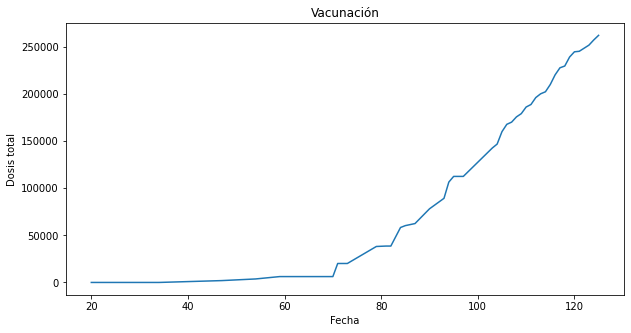

In [37]:
plt.figure(figsize = (10,5))
x = vacunas['fecha'].values.reshape(-1,1)
y = vacunas['segunda_dosis'].values.reshape(-1,1)
plt.plot(x, y,'-', markersize = 5, label ='')
plt.title('Vacunación')  
plt.xlabel('Fecha')  
plt.ylabel('Dosis total') 

plt.show()

In [38]:
X = vacunas.iloc[:, :-1].values  
y = vacunas.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
predict

Actual      Predicted
0  196350  192003.774098
1  106589   99469.189162
2  239431  235175.191209
3  227972  222433.252620
4  252044  261632.599943
5   62537   70751.217823
6       0  -10990.310565
7  170276  163619.316441
8    6228    1996.204188
9    6228   -2661.408048

#### Fecha en la que se podría alcanzar la vacunación total de la población del Ecuador

Este modelo de predicción esta sujeto a muchos cambios, pues existe un gobierno entrante con seguramente otro plan de vacunación, la frecuencia de llegada de nuevas dosis aumentará, se habilitarán puntos de vacunación masivos y entre otros muchos factores que influyen en el modelo actual.

La fecha en la que se puede alcanzar la inmunización total del País es:

In [39]:
date_string = "27/01/2023"
FMT = '%d/%m/%Y'
nuevaFecha =  (datetime.strptime(date_string, FMT) - datetime.strptime("01/01/2021", FMT)).days
predTotal = pol_reg.predict(poly_reg.fit_transform([[nuevaFecha]]))

df1 = pd.DataFrame({date_string: [round(predTotal[0])]}) 
print("Fecha de inmunización total de la población")
df1

Fecha de inmunización total de la población


27/01/2023
0    17033900

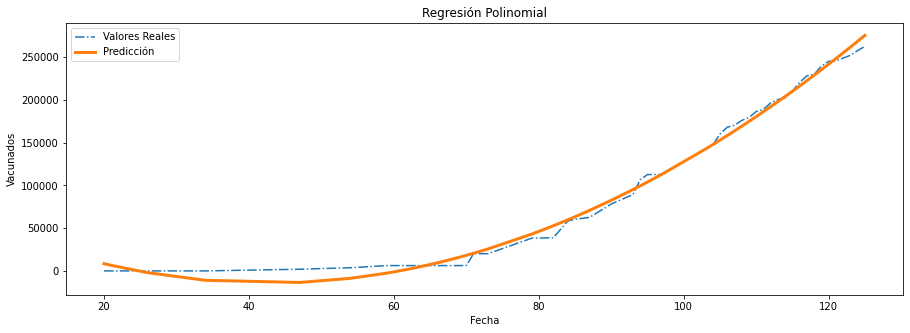

In [40]:
plt.figure(figsize = (15,5))

plt.plot(x, y,'-.', label ='Valores Reales')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(x)),  '-', label = 'Predicción', linewidth = 3)
plt.title('Regresión Polinomial')
plt.xlabel('Fecha')
plt.ylabel('Vacunados')
plt.legend(loc="upper left")
plt.show()

In [41]:
from sklearn.metrics import r2_score
preLin=r2_score(y_test,y_pred)
print("Precisión del modelo: ", preLin)

Precisión del modelo:  0.994319341416951
